## AirBnb assignment 1

The following questions will be answered in this assignment: 
- What Amsterdam will receive from tourist tax if the event lasts a week and you will
have 30.000 visitors
- Plot the amount of AirBnb locations per neighbourhood
- Which street in Amstrdam has the most AirBnB apartments?
- ...?
### Tourist tax for the municipality of Amsterdam?

In [47]:
import pandas as pd
import os.path

path = "C:/Users/bogee/Documents/Master/MADE/Data I/AirBnB/listings.csv"

bnb_df = pd.read_csv(path)
#print('Columns in file:\n', bnb_df.columns)

#print(bnb_df.head())

# Filtering the AirBnB data;
# Selecting only the Private rooms, as we the amount of persons that can stay in an entire apartment varies.
# Selecting a minimum nights of lower than eight, as the event lasts a week. Rooms that have a required number of minimum nights
# higher than eight are not suitable.
# Selecting an availability per year equal or higher than seven, cause an amount lower is not suitable

bnb_wp = bnb_df.loc[(bnb_df['room_type'] == "Private room") & (bnb_df['minimum_nights'] < 8) & (bnb_df['availability_365'] >= 7)]

print(bnb_wp, '\n')


# Selecting only entire apartments, how to find out how many people can stay in which apartment??

#bnb_nf = bnb_df.loc[(bnb_df['room_type'] != "Private room") & (bnb_df['minimum_nights'] < 8) & (bnb_df['availability_365'] >= 7)]

#print(bnb_nf)

# Number of rooms booked, assuming a Private room can hosts two persons

visitors = 30000
pv_rooms = bnb_wp['room_type'].size #is this with the heading 'room_type' ?? ; amount of private rooms available
print('The amount of private rooms available is', pv_rooms, '\n') # = 1427 private rooms available
people_private = 2 * pv_rooms
print(people_private, 'people are able to stay in the available private rooms in Amsterdam\n')
people_ap = visitors - people_private
print(people_ap, 'people have to stay in apartment\n')

rooms = int(visitors / 2) #assuming everyone stays with two persons in a room
#print('The amount of bookings of private rooms for 30000 people is', rooms) # = 15000 bookings (only private)

# Assuming for now that the amount of Private rooms can host everyong -> not true though !!

toeristenbelasting = 10
tourist_tax = 0.10
print('The tourist tax in Amsterdam is %s %%.' % toeristenbelasting, 'Source: Gemeente Amsterdam(n.d.) Toeristenbelasting. https://www.amsterdam.nl/veelgevraagd/toeristenbelasting-2c7c2#\n')

df_tax = pd.DataFrame(columns=['price_tax'])

bnb_wp.index

# Using index method

#for index in bnb_wp.index:
#    tax = bnb_wp['price'][index] * tourist_tax
#    df_tax.loc[index] = [tax]


#Using iloc[] method to calculate the tourist tax and fill this in a new data frame

for index in range(len(bnb_wp)):
    tax = bnb_wp.iloc[index, 9] * tourist_tax
    df_tax.loc[index] = [tax]

print(df_tax)

total_tax = df_tax['price_tax'].sum()
print(f'\nThe total amount of tourist tax Amsterdam will receive is \u20ac {total_tax: .2f}')

                      id                                               name  \
0                 761411  Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...   
2                 768737  Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...   
4                 771343  Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...   
5                 771758  Bed and breakfast in Amsterdam · ★4.60 · 1 bed...   
6                 775655  Rental unit in Amsterdam · ★4.60 · 1 bedroom ·...   
...                  ...                                                ...   
8347  965941127556824966  Home in Amsterdam · ★New · 1 bedroom · 1 bed ·...   
8349  966408306104362165  Home in Amsterdam · ★New · 1 bedroom · 1 bed ·...   
8351  966629012999246204  Home in Amsterdam · ★New · 2 bedrooms · 2 beds...   
8366  968486626435656739  Home in Amsterdam · ★New · 1 bedroom · 1 bed ·...   
8370  969431797914452326  Rental unit in Amsterdam · ★New · 1 bedroom · ...   

        host_id  host_name  neighbourhood_group    

### Plotting the amount of AirBnb locations per neighbourhood

neighbourhood
Centrum-West                              315
Centrum-Oost                              208
De Baarsjes - Oud-West                    149
De Pijp - Rivierenbuurt                   101
Zuid                                       83
Oud-Noord                                  66
Westerpark                                 58
Oud-Oost                                   50
Watergraafsmeer                            47
Oostelijk Havengebied - Indische Buurt     44
Geuzenveld - Slotermeer                    39
IJburg - Zeeburgereiland                   35
Noord-West                                 34
De Aker - Nieuw Sloten                     32
Noord-Oost                                 30
Slotervaart                                27
Bos en Lommer                              26
Buitenveldert - Zuidas                     23
Bijlmer-Centrum                            18
Bijlmer-Oost                               17
Osdorp                                     13
Gaasperdam - Driemon

Text(0.5, 1.0, 'Amount of AirBnBs per neighbourhood in Amsterdam')

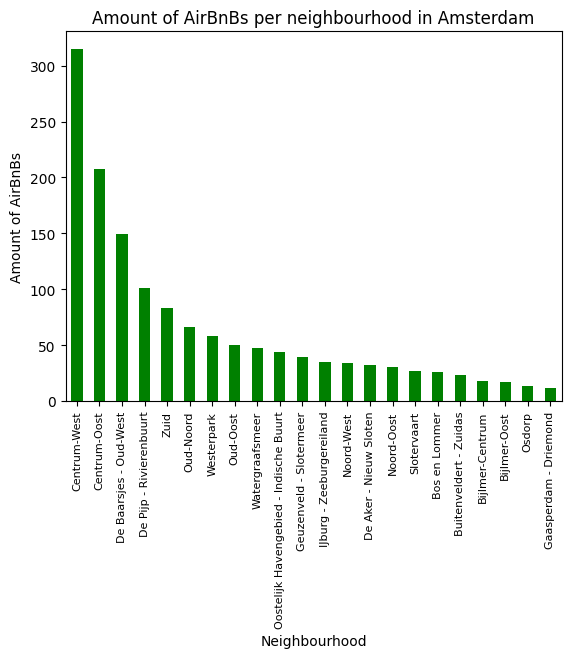

In [48]:
import matplotlib.pyplot as plt

wijk_counts = bnb_wp['neighbourhood'].value_counts()

print(wijk_counts)
print(type(wijk_counts))

wijk_counts.plot.bar(color = 'green')
plt.xlabel("Neighbourhood", size = 10)
plt.ylabel("Amount of AirBnBs", size = 10)
plt.xticks(rotation = 90, size = 8)
plt.title('Amount of AirBnBs per neighbourhood in Amsterdam', size = 12)

### Which street has the most AirBnb apartments

In [10]:
from geopy.geocoders import Nominatim

import geocoder

g = geocoder.osm([52.40164, 4.95106], method='reverse')
g.json['city']
g.json['street']



'Jisperveldstraat'